# Clustering Travel Agency Booking Data

In [36]:
# Import our muduls
import pandas as pd 
import numpy as np
import statsmodels as sm
import pylab as pl
from scipy import stats
from sklearn.externals.six import StringIO
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pydot 
import seaborn as sns

In [37]:
# Download our dataset
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/travel.csv"
travel = pd.read_csv(file_name)

In [38]:
travel.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,1,1,2014-12-15,2014-12-19,2,0,1,8286,1,0,1,0,63,1258,68
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,0,9,2013-03-13,2013-03-14,2,0,1,1842,3,0,1,2,198,786,37
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,1,9,2015-04-03,2015-04-10,2,0,1,8746,1,0,1,6,105,29,22
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,0,0,2013-11-07,2013-11-08,2,0,1,6210,3,1,1,2,198,1234,42
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,0,9,2014-08-03,2014-08-08,2,1,1,12812,5,0,1,2,50,368,83


# Dataset Description of fields (added after video was recorded)
![alt text](https://miro.medium.com/max/704/1*qx6uN9Zr1Y2BVtm_yCAv5Q.png)

In [39]:
# Get some base information on our dataset
print ("Rows     : " , travel.shape[0])
print ("Columns  : " , travel.shape[1])
print ("\nFeatures : \n" ,travel.columns.tolist())
print ("\nMissing values :  ", travel.isnull().sum().values.sum())
print ("\nUnique values :  \n", travel.nunique())

Rows     :  100000
Columns  :  25

Features : 
 ['Unnamed: 0', 'date_time', 'site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 'orig_destination_distance', 'user_id', 'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster']

Missing values :   36329

Unique values :  
 Unnamed: 0                   100000
date_time                     99886
site_name                        41
posa_continent                    5
user_location_country           201
user_location_region            779
user_location_city            10779
orig_destination_distance     62206
user_id                       88863
is_mobile                         2
is_package                        2
channel                          11
srch_ci                        1066
srch_co     

In [40]:
travel.describe()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,63915.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.882530e+07,9.838570,2.678150,85.995070,308.636990,27676.391240,1960.661721,6.054383e+05,0.133770,0.248140,5.858590,2.020710,0.336750,1.111750,14426.32738,2.577290,0.079930,1.487980,3.150920,81.093290,598.848330,49.860370
std,1.086183e+07,11.996426,0.749018,59.292002,208.706581,16768.647409,2228.153377,3.516154e+05,0.340407,0.431936,3.722823,0.909774,0.734449,0.451602,11036.98122,2.149263,0.271186,1.280262,1.620534,56.111519,510.959297,28.885423
min,1.012000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.448967e+06,2.000000,3.000000,66.000000,174.000000,12949.000000,312.792100,2.987962e+05,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,8267.00000,1.000000,0.000000,1.000000,2.000000,50.000000,158.000000,25.000000
50%,1.881212e+07,2.000000,3.000000,66.000000,314.000000,27655.000000,1131.835300,6.028825e+05,0.000000,0.000000,9.000000,2.000000,0.000000,1.000000,9145.00000,1.000000,0.000000,1.000000,2.000000,50.000000,591.000000,49.000000
75%,2.825307e+07,15.000000,3.000000,70.000000,385.000000,42328.000000,2542.359350,9.157222e+05,0.000000,0.000000,9.000000,2.000000,0.000000,1.000000,18784.00000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,73.000000
max,3.767009e+07,53.000000,4.000000,239.000000,1025.000000,56507.000000,11965.376100,1.198783e+06,1.000000,1.000000,10.000000,9.000000,9.000000,8.000000,65035.00000,9.000000,1.000000,120.000000,6.000000,212.000000,2117.000000,99.000000


In [41]:
# Find where the missing values are located
travel.isnull().sum()

Unnamed: 0                       0
date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    36085
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                        122
srch_co                        122
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

In [42]:
# Create our Correlation
corr = travel.corr()
corr

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
Unnamed: 0,1.000000,0.005119,-0.000626,0.001028,0.000501,-0.002442,-0.003072,0.010300,-0.006413,-0.000838,-0.000163,-0.003140,0.000239,-0.004142,0.001031,-0.003505,-0.002716,-0.004491,0.006402,0.003373,0.004371,-0.005887
site_name,0.005119,1.000000,-0.637743,0.159283,0.130818,-0.013471,0.027609,0.030404,-0.005418,0.048820,-0.027780,-0.013405,-0.031962,0.016585,0.034895,-0.006934,-0.013460,0.022274,0.201760,0.263167,-0.068316,-0.026689
posa_continent,-0.000626,-0.637743,1.000000,0.179726,-0.034647,0.039227,0.049808,-0.015209,0.016331,-0.093459,0.089680,0.012350,0.034453,-0.033712,-0.015535,0.037172,0.013319,-0.018952,-0.333578,-0.156578,0.049214,0.018297
user_location_country,0.001028,0.159283,0.179726,1.000000,0.058496,0.122686,0.047689,-0.021091,0.003728,-0.025284,0.109999,0.042526,0.037101,0.000858,0.013486,0.028888,0.001284,0.003539,-0.063744,0.097624,0.015569,-0.011876
user_location_region,0.000501,0.130818,-0.034647,0.058496,1.000000,0.132457,0.136560,0.002225,0.016982,0.040482,-0.001600,0.005487,0.014009,0.000254,0.022567,0.001376,0.000253,-0.007570,0.043027,-0.050301,0.040367,0.004984
user_location_city,-0.002442,-0.013471,0.039227,0.122686,0.132457,1.000000,0.014178,-0.007989,-0.003741,0.013032,0.023497,0.006628,0.002638,-0.000694,0.000786,-0.004399,-0.002655,-0.002175,0.007759,-0.001987,0.008558,0.000102
orig_destination_distance,-0.003072,0.027609,0.049808,0.047689,0.136560,0.014178,1.000000,0.017015,-0.059464,0.041991,-0.000398,-0.024039,-0.059722,-0.012484,-0.036314,-0.042859,-0.033480,0.009483,0.416180,0.254321,-0.090112,0.003624
user_id,0.010300,0.030404,-0.015209,-0.021091,0.002225,-0.007989,0.017015,1.000000,-0.011439,-0.018901,-0.003593,-0.007370,0.002983,-0.001625,0.002716,0.007133,0.001561,0.001355,0.002447,0.008707,-0.002463,0.003202
is_mobile,-0.006413,-0.005418,0.016331,0.003728,0.016982,-0.003741,-0.059464,-0.011439,1.000000,0.046903,-0.030770,0.016661,0.018211,-0.022565,-0.007140,-0.016039,-0.028623,0.008084,-0.024144,-0.029574,0.007644,0.012145
is_package,-0.000838,0.048820,-0.093459,-0.025284,0.040482,0.013032,0.041991,-0.018901,0.046903,1.000000,-0.011269,-0.024097,-0.037673,-0.036653,-0.146647,-0.224422,-0.081307,0.126500,0.108993,-0.044426,-0.014636,0.031399


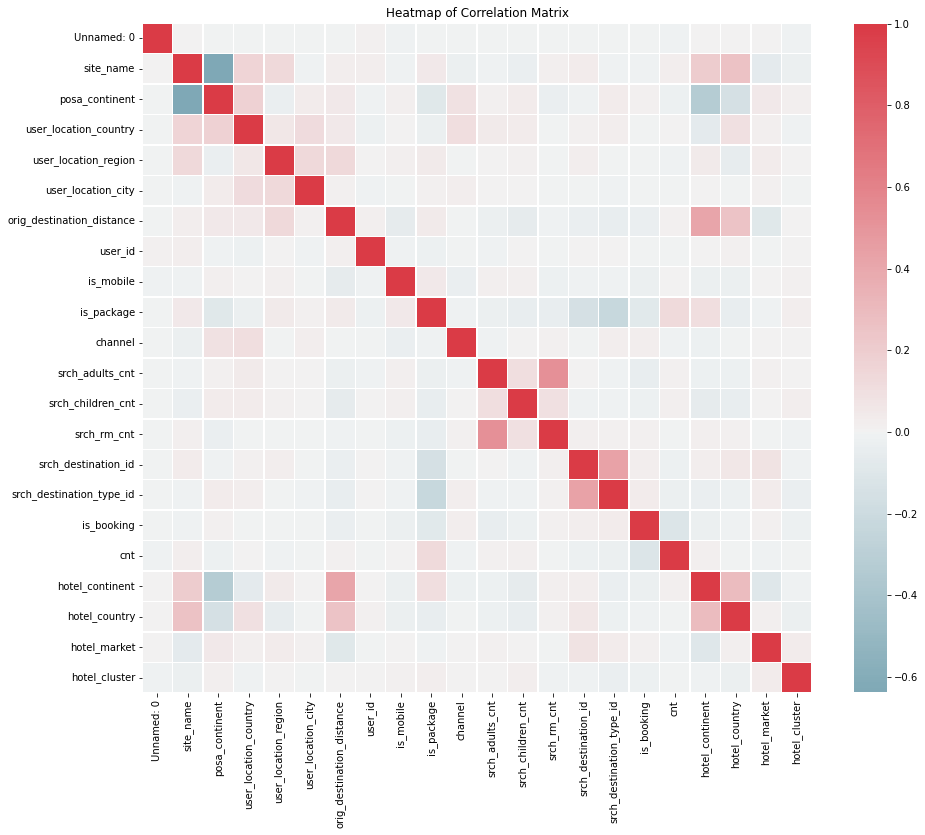

In [43]:
# Generate our correlation plot or heatmap

plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(220,10,as_cmap= True)

sns.heatmap(corr, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap=cmap, vmax=1, center=0,
            square=True,cbar_kws={"shrink": .82},linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40b191dbd0>,
      dtype=object)

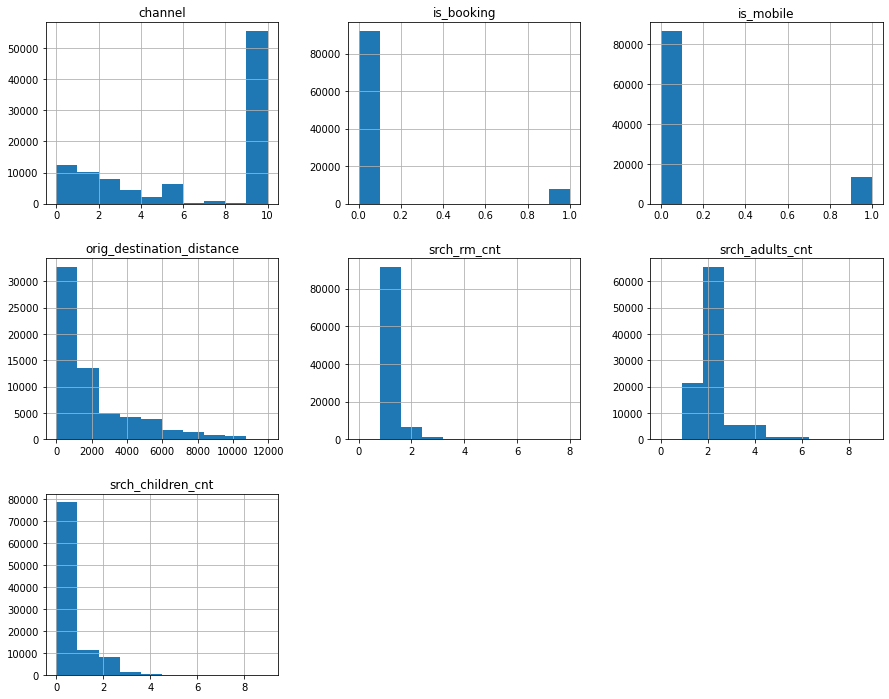

In [44]:
# Plot some of the data

travel[['channel', 'is_booking', 'is_mobile', 'orig_destination_distance', 'srch_rm_cnt',
        'srch_adults_cnt', 'srch_children_cnt']].hist(figsize=(15,12))

In [45]:
# distribution of number of booking attempts
travel.groupby('user_id')['is_booking'].agg('count').reset_index().groupby('is_booking')['user_id'].agg('count')

is_booking
1    79189
2     8423
3     1065
4      161
5       24
6        1
Name: user_id, dtype: int64

In [46]:
# To view the bookings made per user 
booking_count_per_user = travel.groupby('user_id')['is_booking'].agg(['count']).reset_index()

In [47]:
booking_count_per_user

,user_id,count
0,14,1
1,38,1
2,40,1
3,156,2
4,160,1
...,...,...
88858,1198722,1
88859,1198742,1
88860,1198748,1
88861,1198776,1


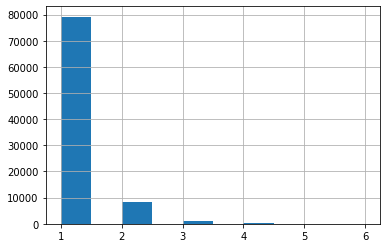

In [48]:
booking_count_per_user['count'].hist(figsize=(6,4))

In [49]:
# Merge this with our orginal dataframe to add our 'count' column
# default 'inner', merging on user_id
travel = travel.merge(booking_count_per_user)
travel.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,1,1,2014-12-15,2014-12-19,2,0,1,8286,1,0,1,0,63,1258,68,2
1,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,792280,0,1,9,2014-08-26,2014-08-31,1,0,1,8286,1,0,1,0,63,1258,14,2
2,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,0,9,2013-03-13,2013-03-14,2,0,1,1842,3,0,1,2,198,786,37,1
3,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,1,9,2015-04-03,2015-04-10,2,0,1,8746,1,0,1,6,105,29,22,1
4,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,0,0,2013-11-07,2013-11-08,2,0,1,6210,3,1,1,2,198,1234,42,2


In [50]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 100000 non-null  int64  
 1   date_time                  100000 non-null  object 
 2   site_name                  100000 non-null  int64  
 3   posa_continent             100000 non-null  int64  
 4   user_location_country      100000 non-null  int64  
 5   user_location_region       100000 non-null  int64  
 6   user_location_city         100000 non-null  int64  
 7   orig_destination_distance  63915 non-null   float64
 8   user_id                    100000 non-null  int64  
 9   is_mobile                  100000 non-null  int64  
 10  is_package                 100000 non-null  int64  
 11  channel                    100000 non-null  int64  
 12  srch_ci                    99878 non-null   object 
 13  srch_co                    998

## Let's do some Logic Checks

In [51]:
# number of guest (number of travelers) need to be > 0
# We use crosstab to group the counts
pd.crosstab(travel['srch_adults_cnt'], travel.srch_children_cnt)

srch_children_cnt,0,1,2,3,4,5,6,7,8,9
srch_adults_cnt,,,,,,,,,,
0,174,2,3,2,0,0,0,0,0,0
1,18749,2137,523,117,11,1,9,1,2,0
2,50736,7093,6529,972,208,14,7,1,0,0
3,3645,1131,469,131,27,5,2,2,0,2
4,3933,690,494,77,83,9,4,0,0,0
5,535,131,41,20,6,4,2,0,0,0
6,669,73,53,28,18,13,7,0,0,0
7,99,20,5,8,6,3,0,0,0,0
8,183,12,13,2,6,1,3,2,2,1


In [52]:
# Then we sum the counts of travellers and drop rows that area equal to zero
travel.drop(travel[travel['srch_adults_cnt'] + travel['srch_children_cnt']==0].index).head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,1,1,2014-12-15,2014-12-19,2,0,1,8286,1,0,1,0,63,1258,68,2
1,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,792280,0,1,9,2014-08-26,2014-08-31,1,0,1,8286,1,0,1,0,63,1258,14,2
2,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,0,9,2013-03-13,2013-03-14,2,0,1,1842,3,0,1,2,198,786,37,1
3,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,1,9,2015-04-03,2015-04-10,2,0,1,8746,1,0,1,6,105,29,22,1
4,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,0,0,2013-11-07,2013-11-08,2,0,1,6210,3,1,1,2,198,1234,42,2


In [53]:
travel.shape

(100000, 26)

In [54]:
# Change the column type to date time type using pandas 
travel['srch_co'] = pd.to_datetime(travel.srch_co)
travel['srch_ci'] = pd.to_datetime(travel.srch_ci)
travel['date_time'] = pd.to_datetime(travel.date_time)

# Change the timestamp of date_time (2014-1-03 16:02:28) to simply "2014-11-03"
travel['date'] = pd.to_datetime(travel.date_time).apply(lambda x: x.date())


In [55]:
travel['date'] = pd.to_datetime(travel['date'])

In [56]:
travel.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count,date
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,1,1,2014-12-15,2014-12-19,2,0,1,8286,1,0,1,0,63,1258,68,2,2014-11-03
1,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,792280,0,1,9,2014-08-26,2014-08-31,1,0,1,8286,1,0,1,0,63,1258,14,2,2014-07-28
2,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,0,9,2013-03-13,2013-03-14,2,0,1,1842,3,0,1,2,198,786,37,1,2013-03-13
3,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,1,9,2015-04-03,2015-04-10,2,0,1,8746,1,0,1,6,105,29,22,1,2014-10-13
4,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,0,0,2013-11-07,2013-11-08,2,0,1,6210,3,1,1,2,198,1234,42,2,2013-11-05


In [57]:
# Check-out date need to be later than check-in date;
travel[travel['srch_co'] < travel['srch_ci']][['srch_co', 'srch_ci']]


,srch_co,srch_ci
34410,2013-05-27,2013-08-20
42412,2015-05-09,2015-08-31


In [58]:
# Check-in date need to be later than booking date
travel[travel.srch_ci < travel.date][['srch_ci', 'date']]

,srch_ci,date
7138,2014-01-05,2014-01-07
14931,2014-10-13,2014-10-14
18778,2014-06-11,2014-11-10
22722,2014-02-11,2014-10-09
25886,2014-03-10,2014-09-15
26795,2014-09-12,2014-12-02
29591,2014-08-02,2014-08-23
33886,2013-01-16,2013-01-17
33887,2014-03-03,2014-03-04
33888,2013-01-21,2013-01-22


## Feature Engineering

In [59]:
# Let's create some new columns that can provide some useful info 
def duration(df):
  # Give the duration of trip 
  delta = (df['srch_co'] - df['srch_ci'])/np.timedelta64(1,'D')
  if delta <= 0:
    return np.nan
  else: 
    return delta

def days_in_advance(df):
  # Give the days the trip was booked in advance
  delta = (df['srch_ci'] - df['date'])/np.timedelta64(1,'D')
  if delta <= 0:
    return np.nan
  else: 
    return delta

# Duration is finds the length of stay by sunbtratin the checkout day from the chekin day
travel['duration'] = travel.apply(duration,axis = 1)

# Shows how long in advance the booking was made. Done by substracting the checkin date from the booking days
travel['days_in_advance'] = travel.apply(days_in_advance, axis=1)

In [60]:
travel.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count,date,duration,days_in_advance
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,1,1,2014-12-15,2014-12-19,2,0,1,8286,1,0,1,0,63,1258,68,2,2014-11-03,4.0,42.0
1,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,792280,0,1,9,2014-08-26,2014-08-31,1,0,1,8286,1,0,1,0,63,1258,14,2,2014-07-28,5.0,29.0
2,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,0,9,2013-03-13,2013-03-14,2,0,1,1842,3,0,1,2,198,786,37,1,2013-03-13,1.0,NaN
3,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,1,9,2015-04-03,2015-04-10,2,0,1,8746,1,0,1,6,105,29,22,1,2014-10-13,7.0,172.0
4,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,0,0,2013-11-07,2013-11-08,2,0,1,6210,3,1,1,2,198,1234,42,2,2013-11-05,1.0,2.0


## Statistical Analysis of Booking Channels

In [61]:
# Let's look at how each channel performs by seeing the booking rate for each channel type
# Booking rate per channel
travel.groupby('channel')['is_booking'].agg(['mean','count']).reset_index().sort_values(by='channel').rename(columns={'mean':'booking_rate', 'count':'num_of_booking'})

,channel,booking_rate,num_of_booking
0,0,0.071948,12523
1,1,0.069690,10274
2,2,0.060490,7836
3,3,0.060400,4404
4,4,0.120784,2194
5,5,0.094349,6158
6,6,0.067901,162
7,7,0.043157,811
8,8,0.055351,271
9,9,0.085381,55352


In [62]:
def  stats_compairsion(i):
  # Return a breakdown  of stats per chanel
  cat = travel.groupby(i)['is_booking'].agg(['mean', 'count']).reset_index().rename(columns={'mean': 'sub_average', 'count': 'sub_bookings'})
  cat['overall_average'] = travel.is_booking.mean()
  cat['overall_bookings'] = travel.is_booking.count()

  # Give the sum of the other types of booking
  cat['rest_bookings'] = cat.overall_bookings - cat.sub_bookings
  # Gives the average of the other bookings.
  cat['rest_average'] = (cat['overall_bookings']*cat['overall_average'] - cat['sub_bookings']*cat['sub_average'])/cat['rest_bookings']

  # A z-score is the number of standard deviations from the mean a data point is.
  # We get the z-scores for channel average compared to the average of the others (excluding the channel we are analyzing)
  cat['z_score'] = (cat['sub_average']-cat['rest_average'])/np.sqrt(cat['overall_average']*(1-cat['overall_average'])*(1/cat['sub_bookings']+1/cat['rest_bookings']))
  cat['prob'] = np.around(stats.norm.cdf(cat.z_score), decimals = 10)
  cat['significant'] = [(lambda x: 1 if x > 0.9 else -1 if x < 0.1 else 0)(i) for i in cat['prob']]
  return cat


In [63]:
stats_compairsion('channel')

,channel,sub_average,sub_bookings,overall_average,overall_bookings,rest_bookings,rest_average,z_score,prob,significant
0,0,0.071948,12523,0.07993,100000,87477,0.081073,-3.521880,2.142494e-04,-1
1,1,0.069690,10274,0.07993,100000,89726,0.081102,-4.040405,2.667950e-05,-1
2,2,0.060490,7836,0.07993,100000,92164,0.081583,-6.609924,0.000000e+00,-1
3,3,0.060400,4404,0.07993,100000,95596,0.080830,-4.888198,5.088000e-07,-1
4,4,0.120784,2194,0.07993,100000,97806,0.079014,7.135170,1.000000e+00,1
5,5,0.094349,6158,0.07993,100000,93842,0.078984,4.307105,9.999917e-01,1
6,6,0.067901,162,0.07993,100000,99838,0.079950,-0.565022,2.860294e-01,0
7,7,0.043157,811,0.07993,100000,99189,0.080231,-3.877458,5.277670e-05,-1
8,8,0.055351,271,0.07993,100000,99729,0.079997,-1.494103,6.757429e-02,-1
9,9,0.085381,55352,0.07993,100000,44648,0.073172,7.077231,1.000000e+00,1



# Let's start clustering

## Step 1: Let's choose some features using our business domain knowledge and explore these 
**Note:** you're free to add and remove


In [64]:
# Our seleted feaures
features_to_explore = ['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']
# Let's create two new dataframe with our new data called city_data and another where do a groupby on city_data on user_location_city
city_data = travel.dropna(axis=0)[features_to_explore + ['user_location_city']]
city_groups = city_data.groupby('user_location_city').mean().reset_index().dropna(axis=0)


In [65]:
city_groups.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,2.0000,78.50,2315.83625,0.0000,0.25,1.7500,0.00,1.0
1,3,4.5625,92.25,3550.01750,0.0625,0.25,1.9375,0.50,1.0
2,7,14.0000,58.00,5994.86400,0.0000,1.00,2.0000,0.00,1.0
3,14,7.0000,35.75,5342.81910,0.0000,0.00,2.0000,0.75,1.0
4,21,5.0000,31.50,2165.76890,0.0000,0.50,1.5000,1.00,1.0


In [66]:
city_groups.shape

(4480, 9)

In [67]:
city_groups.describe()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
count,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000
mean,28379.614955,3.433958,58.263446,1838.549129,0.130339,0.258446,2.076501,0.370352,1.119886
std,16472.819111,2.089553,46.579405,1619.647793,0.222915,0.306146,0.650905,0.542366,0.368028
min,0.000000,1.000000,1.000000,0.408200,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13961.500000,2.250000,27.000000,750.422850,0.000000,0.000000,1.875000,0.000000,1.000000
50%,28604.500000,3.000000,50.000000,1479.596302,0.000000,0.183791,2.000000,0.222222,1.000000
75%,42588.750000,4.000000,74.000000,2313.126216,0.181818,0.400000,2.142857,0.500000,1.101014
max,56507.000000,40.000000,366.000000,11428.188600,1.000000,1.000000,9.000000,8.000000,8.000000


## Step 2: Standardizing our data

In [68]:
# We see the magnitude variations in our features are large (compare duration to is_mobile for ex

city_groups_std = city_groups.copy()
cols = ['duration', 'days_in_advance', 'orig_destination_distance',	'is_mobile', 'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']

city_groups_std[cols] = preprocessing.scale(city_groups_std[cols])

city_groups_std.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,-0.686327,0.434501,0.294719,-0.584771,-0.027592,-0.501667,-0.682922,-0.32579
1,3,0.540148,0.729729,1.056810,-0.304363,-0.027592,-0.213574,0.239068,-0.32579
2,7,5.057167,-0.005656,2.566471,-0.584771,2.422492,-0.117543,-0.682922,-0.32579
3,14,1.706795,-0.483389,2.163842,-0.584771,-0.844287,-0.117543,0.700063,-0.32579
4,21,0.749546,-0.574641,0.202054,-0.584771,0.789103,-0.885790,1.161059,-0.32579


In [69]:
city_groups_std.describe()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
count,4480.000000,4.480000e+03,4.480000e+03,4.480000e+03,4.480000e+03,4.480000e+03,4.480000e+03,4.480000e+03,4.480000e+03
mean,28379.614955,-1.506483e-16,-1.182586e-16,-8.622815e-17,4.871599e-16,-1.779331e-16,-3.005780e-16,3.111227e-16,4.442379e-16
std,16472.819111,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00
min,0.000000,-1.164952e+00,-1.229510e+00,-1.135028e+00,-5.847710e-01,-8.442868e-01,-3.190533e+00,-6.829222e-01,-3.257897e-01
25%,13961.500000,-5.666713e-01,-6.712610e-01,-6.719039e-01,-5.847710e-01,-8.442868e-01,-3.096047e-01,-6.829222e-01,-3.257897e-01
50%,28604.500000,-2.077029e-01,-1.774254e-01,-2.216487e-01,-5.847710e-01,-2.438830e-01,-1.175428e-01,-2.731487e-01,-3.257897e-01
75%,42588.750000,2.709217e-01,3.378813e-01,2.930452e-01,2.309608e-01,4.624249e-01,1.019565e-01,2.390682e-01,-5.128624e-02
max,56507.000000,1.750141e+01,6.607446e+00,5.921479e+00,3.901754e+00,2.422492e+00,1.063792e+01,1.406892e+01,1.869665e+01


## Step 3: Implement Clustering via K-means



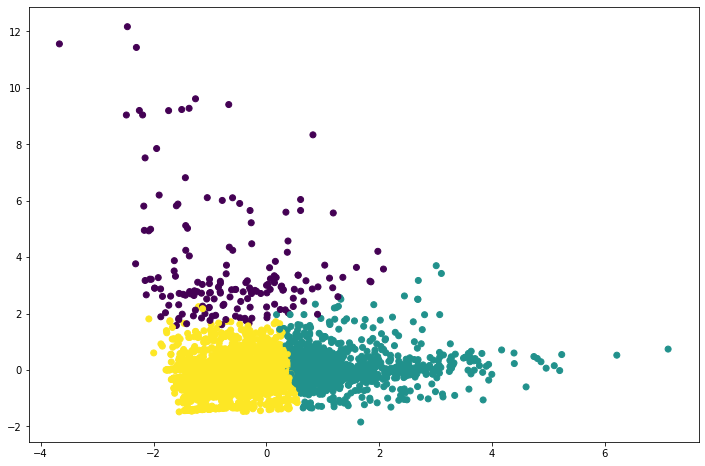

In [75]:
# Let's try arbitraity 3 clusters

km = cluster.KMeans(n_clusters=3, max_iter=300, random_state=None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)
#pca.fit(city_groups[features_to_explore])
city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 1]
plt.figure(figsize=(12,8))
plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.show()

In [76]:
city_groups_std.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,cluster,x,y
0,0,-0.686327,0.434501,0.294719,-0.584771,-0.027592,-0.501667,-0.682922,-0.32579,2,0.093598,-0.516142
1,3,0.540148,0.729729,1.056810,-0.304363,-0.027592,-0.213574,0.239068,-0.32579,1,0.901611,-0.094680
2,7,5.057167,-0.005656,2.566471,-0.584771,2.422492,-0.117543,-0.682922,-0.32579,1,3.834762,-0.084683
3,14,1.706795,-0.483389,2.163842,-0.584771,-0.844287,-0.117543,0.700063,-0.32579,1,1.003460,-0.036775
4,21,0.749546,-0.574641,0.202054,-0.584771,0.789103,-0.885790,1.161059,-0.32579,2,0.406716,-0.523719


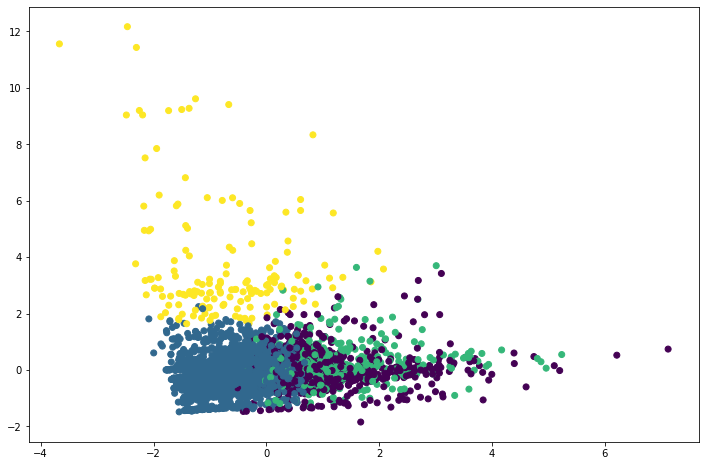

In [77]:
# Now with 4

km = cluster.KMeans(n_clusters=4, max_iter=300, random_state=None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)
#pca.fit(city_groups[features_to_explore])
city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 1]
plt.figure(figsize=(12,8))
plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.show()

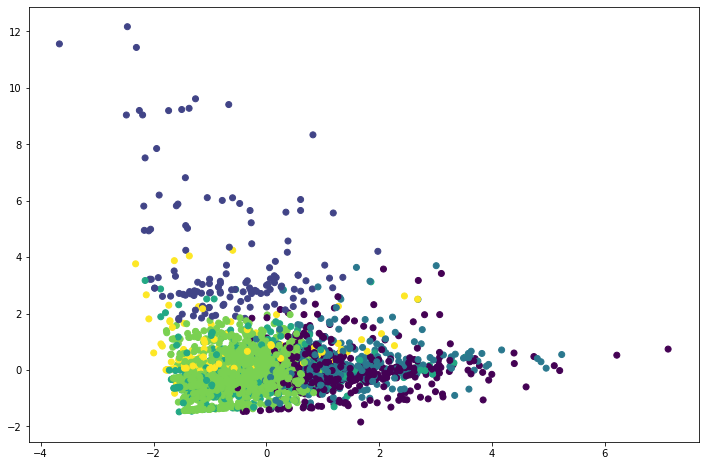

In [79]:
# Now with 6
km = cluster.KMeans(n_clusters=6, max_iter=300, random_state=None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)
#pca.fit(city_groups[features_to_explore])
city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 1]
plt.figure(figsize=(12,8))
plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.show()

# Let's attemp to use the Elbow Method

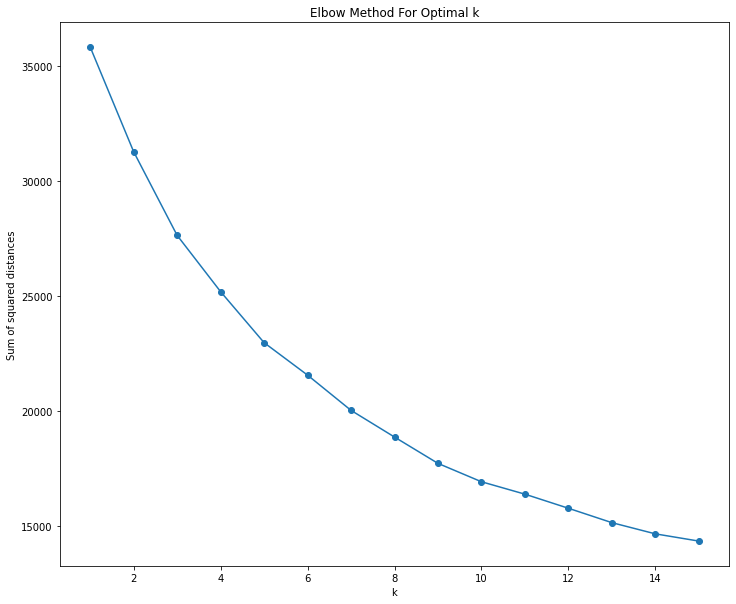

In [86]:
from sklearn.cluster import KMeans

sum_of_squared_distance = []

# Use k from 1 to 15
K = range(1,16)

for k in K:
  km = cluster.KMeans(n_clusters=k, max_iter=300, random_state=None)
  km = km.fit(city_groups_std[features_to_explore])

  # Get sum of square distances by applying km.inertia_
  sum_of_squared_distance.append(km.inertia_)

# Plot result
plt.figure(figsize=(12,10))
plt.plot(K, sum_of_squared_distance, marker='o')
plt.xlabel("k")
plt.ylabel('Sum of squared distances')
plt.title("Elbow Method For Optimal k")
plt.show()

# Let's try to use the Silhouette Coefficent 

In [88]:
from sklearn.metrics import silhouette_score

for n_cluster in range(2,11):
  kmeans = KMeans(n_clusters=n_cluster).fit(city_groups_std[features_to_explore])
  label = kmeans.labels_
  sil_coeff = silhouette_score(city_groups_std[features_to_explore], label, metric='euclidean')
  print("For n_cluster= {}, The Silhouette Coefficent is {}".format(n_cluster, sil_coeff))


For n_cluster= 2, The Silhouette Coefficent is 0.250847845534463
For n_cluster= 3, The Silhouette Coefficent is 0.26509761927747333
For n_cluster= 4, The Silhouette Coefficent is 0.2665856025192171
For n_cluster= 5, The Silhouette Coefficent is 0.26864773764592803
For n_cluster= 6, The Silhouette Coefficent is 0.2740891297919896
For n_cluster= 7, The Silhouette Coefficent is 0.15442335018921716
For n_cluster= 8, The Silhouette Coefficent is 0.15891231491160576
For n_cluster= 9, The Silhouette Coefficent is 0.1683994003535075
For n_cluster= 10, The Silhouette Coefficent is 0.17614978309792392


# Choose n_cluster = 3

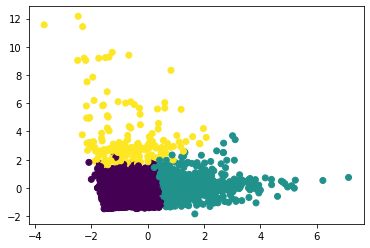

In [89]:
km = cluster.KMeans(n_clusters=3, max_iter=300, random_state=None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)
pca.fit(city_groups[features_to_explore])
city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 1]
plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.show()

# Step 4: Profile and Inspect our 3 clusters

In [91]:
city_groups_std.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,cluster,x,y
0,0,-0.686327,0.434501,0.294719,-0.584771,-0.027592,-0.501667,-0.682922,-0.32579,0,0.093598,-0.516142
1,3,0.540148,0.729729,1.056810,-0.304363,-0.027592,-0.213574,0.239068,-0.32579,1,0.901611,-0.094680
2,7,5.057167,-0.005656,2.566471,-0.584771,2.422492,-0.117543,-0.682922,-0.32579,1,3.834762,-0.084683
3,14,1.706795,-0.483389,2.163842,-0.584771,-0.844287,-0.117543,0.700063,-0.32579,1,1.003460,-0.036775
4,21,0.749546,-0.574641,0.202054,-0.584771,0.789103,-0.885790,1.161059,-0.32579,0,0.406716,-0.523719


In [93]:
city_groups.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,2.0000,78.50,2315.83625,0.0000,0.25,1.7500,0.00,1.0
1,3,4.5625,92.25,3550.01750,0.0625,0.25,1.9375,0.50,1.0
2,7,14.0000,58.00,5994.86400,0.0000,1.00,2.0000,0.00,1.0
3,14,7.0000,35.75,5342.81910,0.0000,0.00,2.0000,0.75,1.0
4,21,5.0000,31.50,2165.76890,0.0000,0.50,1.5000,1.00,1.0


In [94]:
# We will merge the two dataframe based on a common column user_location_city
city_groups.merge(city_groups_std[['user_location_city', 'cluster']]).groupby('cluster').mean() # for every column


,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
cluster,,,,,,,,,
0,28051.712422,2.808798,43.197962,1396.556404,0.136965,0.183044,1.991689,0.377599,1.069823
1,28956.789570,5.333288,102.980193,3186.444284,0.113170,0.490200,2.019566,0.319374,1.070290
2,30924.491018,3.056986,56.080539,1538.951343,0.114970,0.195509,4.084431,0.564271,2.409780


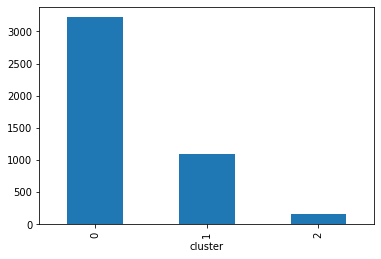

In [95]:
# Plot our Cluster counts
city_groups_std.groupby('cluster')['user_location_city'].count().plot.bar()